In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import svm
import statsmodels.api as sm

# Read data

In [32]:
df = pd.read_csv('case_CarPrice.csv', encoding='utf-8')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Preprocessing

## Remove duplicates & NA

In [34]:
df = df.dropna()
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Add 'CarBrand' column

### Add

In [35]:
car_brand = []

for i in df.index:
    car_brand.append(df['CarName'][i].split(' ')[0])

df.insert(3,'CarBrand',car_brand)

In [36]:
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Revise typo

In [37]:
replace_brand = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['CarBrand'].replace(replace_brand,inplace=True)

df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Outlier Elimination

- Method: IQR
- Outlier Replacement: Replace outliers with the neareast limits

In [38]:
## iqr
for col in df.select_dtypes(include=['int','float']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    df[col] = df[col][df[col] >= (q1-1.5*iqr)]
    df[col].fillna(df[col].min(),inplace=True)
    df[col] = df[col][df[col] <= (q3+1.5*iqr)]
    df[col].fillna(df[col].max(),inplace=True)


# Price Analysis

## First look: Distribution of Price

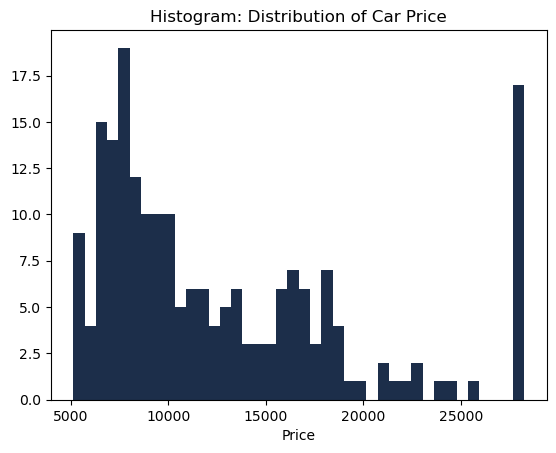

In [39]:
plt.hist(df['price'], bins=40, histtype="stepfilled", color='#1c2e4a')
plt.title('Histogram: Distribution of Car Price')
plt.xlabel('Price')
plt.show()

### Conclusion
- Generally, the majority of cars sold's prices vary from $5000 to $10000 - the low range
- A considerable price is at over $25000, which means US citizens also favor luxurious cars

## Price vs. Brand

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1045762015.py:2: FutureWarning: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_brand = df.groupby(df['CarBrand']).aggregate(['min','max','mean','count'])['price']


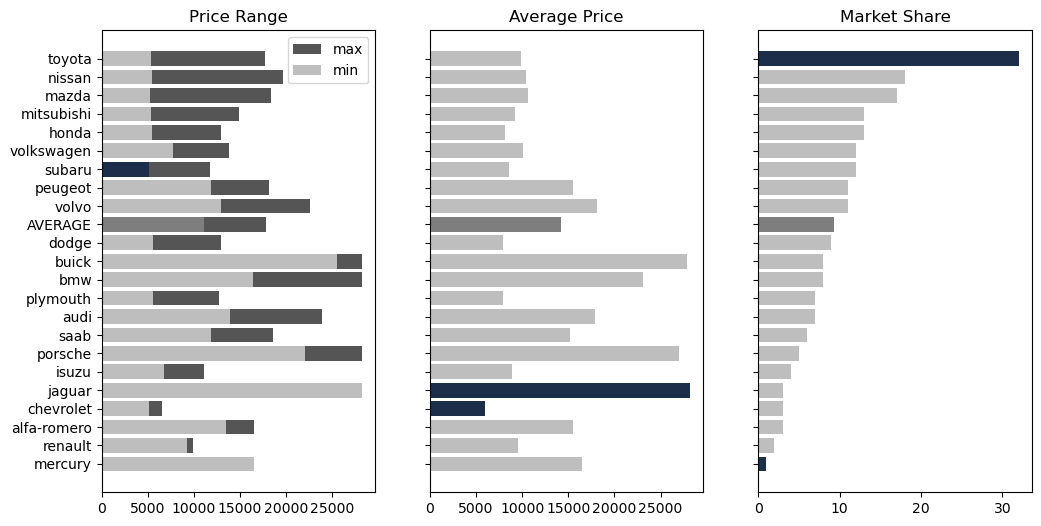

In [40]:
## calculate - GROUP BY
df_brand = df.groupby(df['CarBrand']).aggregate(['min','max','mean','count'])['price']
df_brand = pd.DataFrame(df_brand)
## calculate mean of each feature
df_brand_mean = pd.DataFrame(df_brand.mean(),columns=['AVERAGE']).transpose()
df_brand = pd.concat([df_brand,df_brand_mean], axis=0).sort_values('count')


## def color for visualization
def set_color(data, type, base1, base_min = None):
    color = []
    if base_min != None:
        for index in data.index:
            if index == 'AVERAGE':
                color.append('#7e7e7e')
            elif (data[type][index] == base1) or (data[type][index] == base_min):
                color.append('#1c2e4a')
            else:
                color.append('#bebebe')
    else:
        for index in data.index:
            if data[type][index] == base1:
                color.append('#1c2e4a')
            else:
                if index == 'AVERAGE':
                    color.append('#7e7e7e')
                else:
                    color.append('#bebebe')
        for _ in range(len(data)):
            color.append('#bebebe')
    return color

def color(data,type):
    if type.lower() == 'min':
        base = float(data[data[type] == data[type].min()][type.lower()].values[0])
        color=set_color(data,type.lower(), base)
    elif type.lower() == 'max':
        base = float(data[data[type] == data[type].max()][type.lower()].values[0])
        color=set_color(data,type.lower(), base)
    elif (type.lower() == 'mean') or (type.lower() == 'count'):
        base1 = float(data[data[type] == data[type].max()][type.lower()].values[0])
        base_min = float(data[data[type] == data[type].min()][type.lower()].values[0])
        color=set_color(data,type.lower(), base1=base1, base_min=base_min)
    return color


## visualize - MULTIPLE BARHS
x1 = df_brand['min']
x2 = df_brand['max']
x3 = df_brand['mean']
x4 = df_brand['count']
y = df_brand.index

fig, axes = plt.subplots(1,3, sharey=True)
fig.set_size_inches(12,6)
axes[0].barh(y,x2,color='#555555')
axes[0].barh(y,x1,color=color(df_brand,'min'))
axes[1].barh(y,x3,color=color(df_brand,'mean'))
axes[2].barh(y,x4,color=color(df_brand,'count'))

axes[0].set_title('Price Range')
axes[1].set_title('Average Price')
axes[2].set_title('Market Share')

axes[0].legend(['max','min'])
plt.show()


### Conclusion
- According to Brand:
    - Least expensive brand: Chevrolet
    - Most expensive brand: Jaguar
    - Least expensive car: Subaru
    - Most expensive car: Posche, Jaguar, Buick, BMW
- Some comments on the figures:
    - Brands that domain the market share generally have:
        - Average price below the average price of the whole market, except for Volvo & Peugeot (graph 3)
        - Maximum price equal or below the average max price of the whole market, except for Volvo & Nissan (graph 2)
        - Minimum price equal or below the averge min price of the whole market, except for Volvo & Peugeout (group 3)
        - Price range is relatively large, which means they provide cars based on different types of customers - lower limit is noticeably less than min average & upper limit is nearly equal to or less than max average
    - Brands that have less market share tend to have extreme prices (extremely low or high), leading to small price ranges  (graph 2)
        - Even if the range is large enough, its limits are either unreacheable (too expensive) or too cheap (which may lead to customers' doubts on quality) (graph 1)
- ADVICE:
    - The less expensive (but not too cheap), the more cars are sold
    - The price should be less than average price a little bit, around $15,000
    - Range should be approacheable for more customers, approximately $10,000
    

## Price vs. Others

### Spearman testing - Ordinal data & Quantitative data

Notice that only Symboling has ordinal type: the less, the safer

In [41]:
alpha = 0.05
test_result = stats.spearmanr(df['symboling'], df['price'])

if test_result[1] < alpha:
    if test_result[0] < 0:
        print('Symboling and Price have a NEGATIVE relation')
    else:
        print('Symboling and Price have a POSITIVE relation')
else:
    print('Symboling and Price have a NO relation')

Symboling and Price have a NEGATIVE relation


#### Conclusion
- Symboling and Price have a reversed relation, which implies that the safer, the more expensive the car is

### Pearson testing - Quantitative data

In [42]:
def pearson_test(testing_list, alpha=0.05):
    col = 0
    while col <= len(testing_list):
        i=0
        distance = len(testing_list) - col
        fig, axes = plt.subplots(ncols=(3 if distance >=3 else (1 if distance==0 else 2)))
        fig.set_size_inches(12,3)
        for factor in testing_list[col:(col+(3 if distance >=3 else (1 if distance==0 else 2)))]:
            if factor == 'price':
                plt.close()
                break
            # visualize
            sns.regplot(factor,'price',data=df,ax=axes[i], scatter_kws={'color':'#bebebe'}, line_kws={'color':'#1c2e4a'})
            # test
            test_result = stats.pearsonr(df['price'], df[factor])
            if test_result[1] < alpha:
                print(f'{factor} and Price have a relation\n''')
            else:
                print(f'{factor} and Price have a NO relation\n''')
            i += 1
        col += 3



c:\Users\ASUS FLIP 14\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


wheelbase and Price have a relation

carlength and Price have a relation

carwidth and Price have a relation

carheight and Price have a relation

enginesize and Price have a relation

boreratio and Price have a relation

stroke and Price have a NO relation

compressionratio and Price have a NO relation

horsepower and Price have a relation

peakrpm and Price have a NO relation

citympg and Price have a relation

highwaympg and Price have a relation



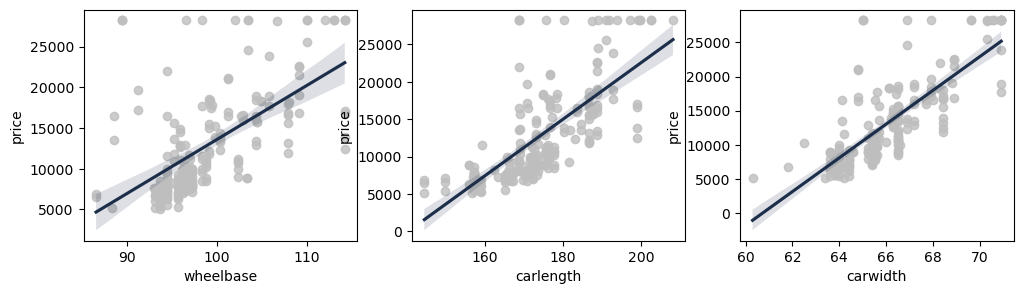

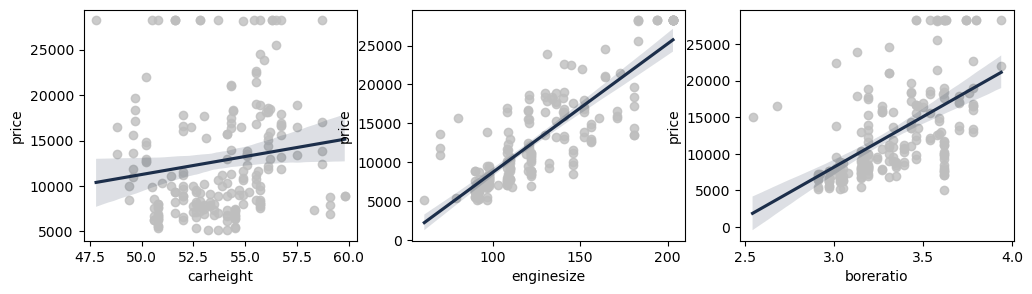

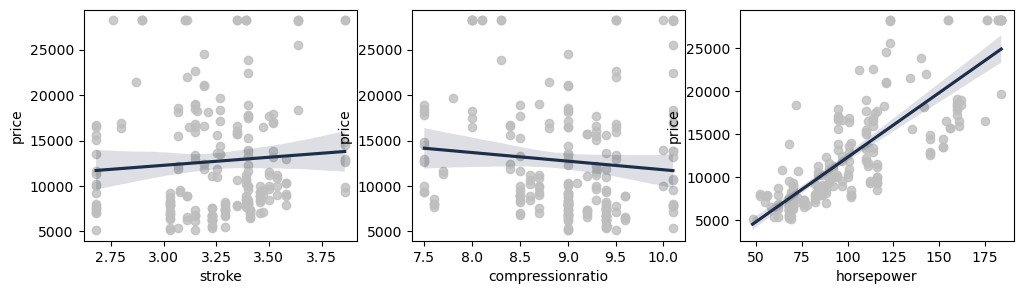

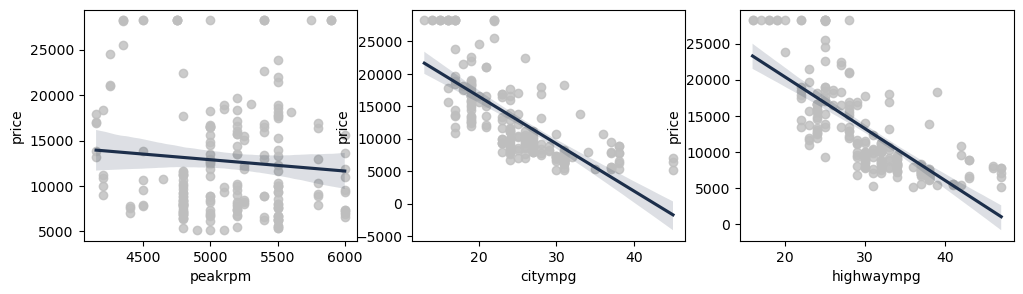

In [43]:
quantitve_data = df.select_dtypes(include='float').columns

pearson_test(quantitve_data)

#### Conclusion
- Stroke, Compressionratio and Peakrpm have nothing to do with Price
- Others have relations:
    - MPGs (Citympg, Highwaympg) have NEGATIVE relations with Price, which means: 
        - The less fuel-efficient, the more expensive a car is
    - Others have POSITIVE. Some conclusions:
        - The stronger the car is (based on HP), the more expensive it is
            - this statement can explain why expensive cars are lack of fuel efficiency
        - The more materials are used to make cars (based on size ratios: wheelbase, carlength, carweight, carheight), the more expensive a car is
        - The more bore-ratio, the more expensive
            - this statement can explain why expensive cars are much stronger

### ANOVA - Categorical data vs. Quantitative data

In [44]:
## def activate func - [crosstab + chi2]
def anova_test(testing_list,alpha=0.05):
    for row in testing_list:
        # group by
        temp_table = df.groupby(df[row])['price'].apply(list)
        # test
        test_result = stats.f_oneway(*temp_table)
        # conclusion
        if test_result[1] < alpha:
            if 1-test_result[0]<0.001:
                print(f'{row} and price have a TIGHT relation\n''')
            else:
                print(f'{row} and price have a relation\n''')
        else:
            print(f'{row} and price have NO relation\n''')

In [45]:
## filter categorical independent variables
anova_data = df.iloc[:, 4:].select_dtypes(include='object')

## use func
anova_test(anova_data)

fueltype and price have a TIGHT relation

aspiration and price have a TIGHT relation

doornumber and price have NO relation

carbody and price have a TIGHT relation

drivewheel and price have a TIGHT relation

enginelocation and price have a TIGHT relation

enginetype and price have a TIGHT relation

cylindernumber and price have a TIGHT relation

fuelsystem and price have a TIGHT relation



#### Conclution
According to ANOVA test, among categorical features, only 'doornumber' feature has no effect on price

### A Closer Look on Categorical data

Visualization will once again assure our above hypothesis testing results

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


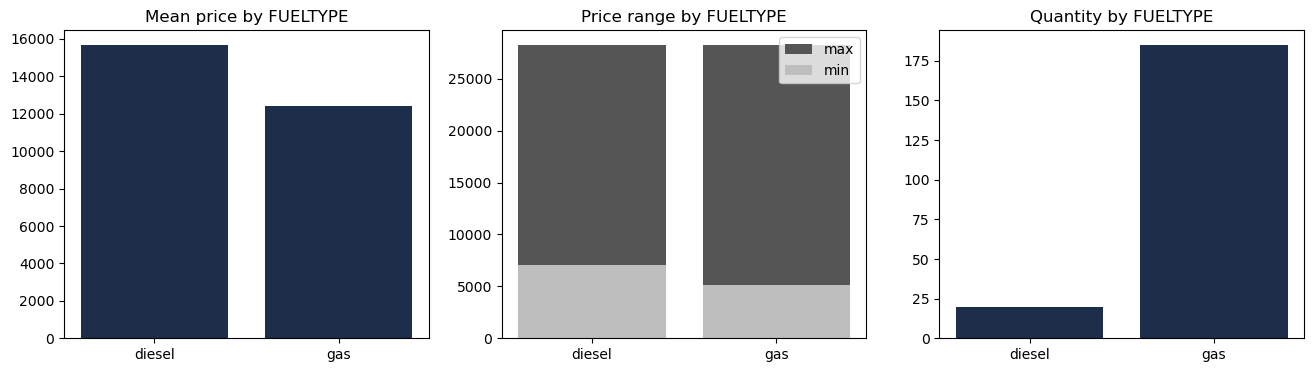

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


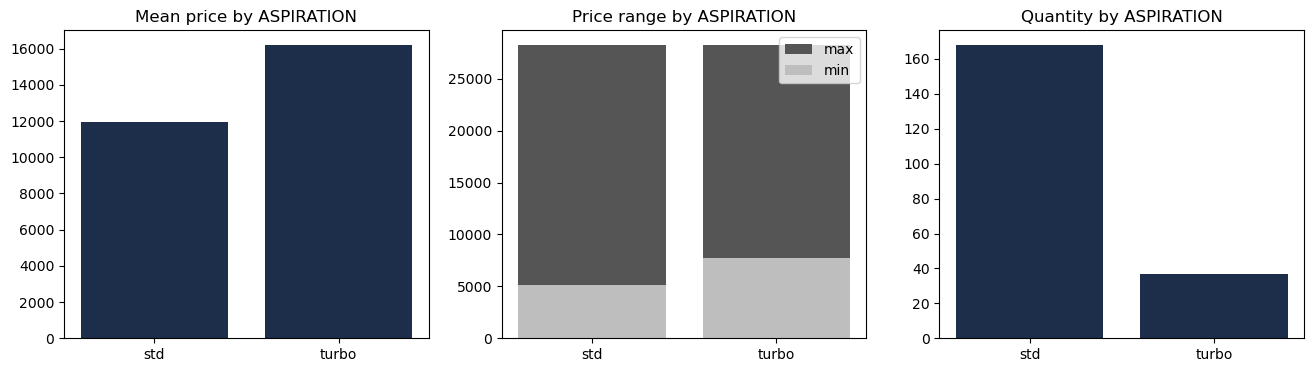

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


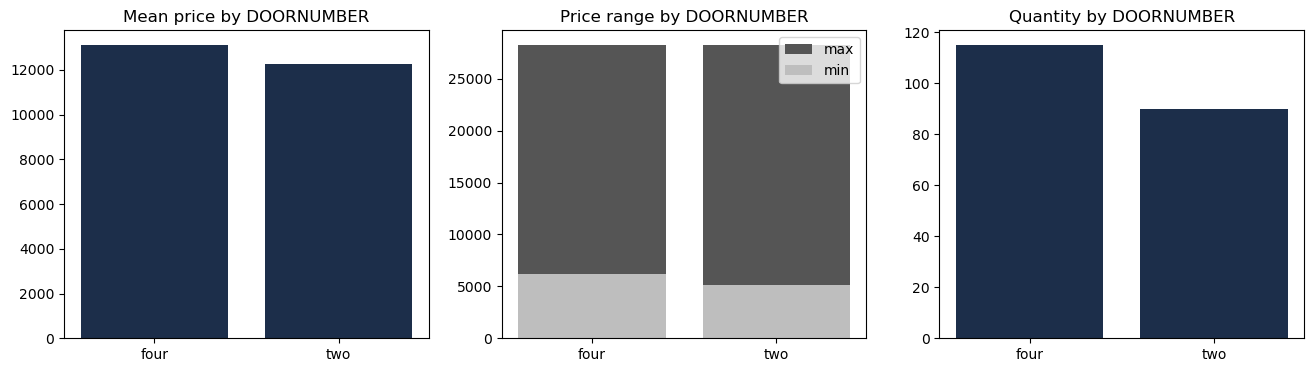

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


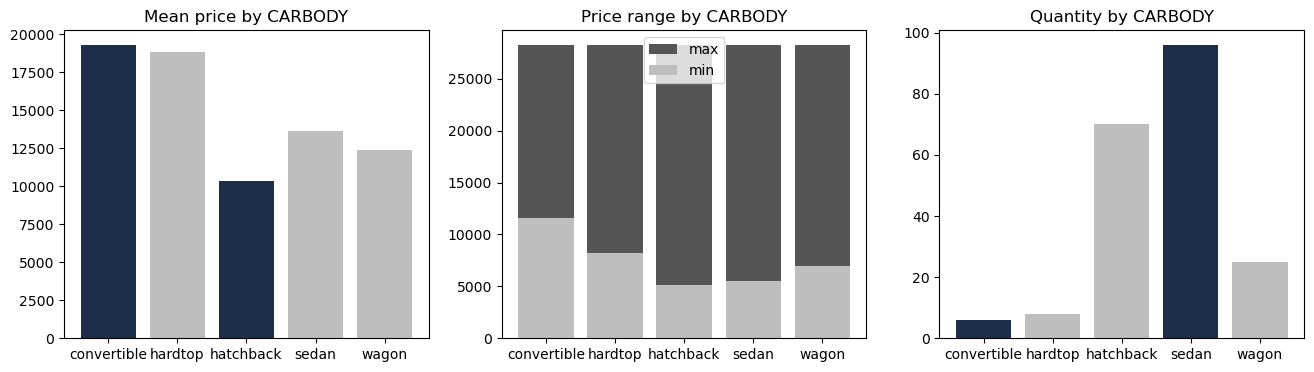

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


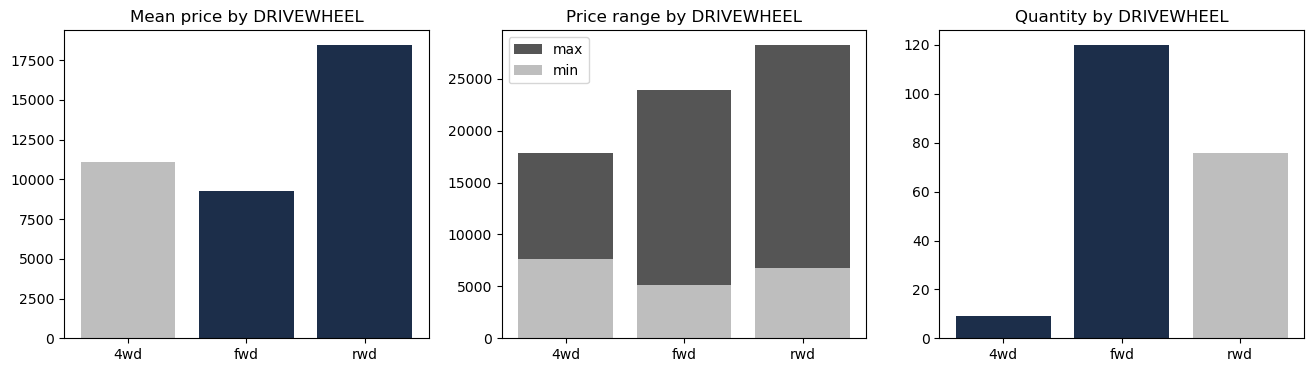

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


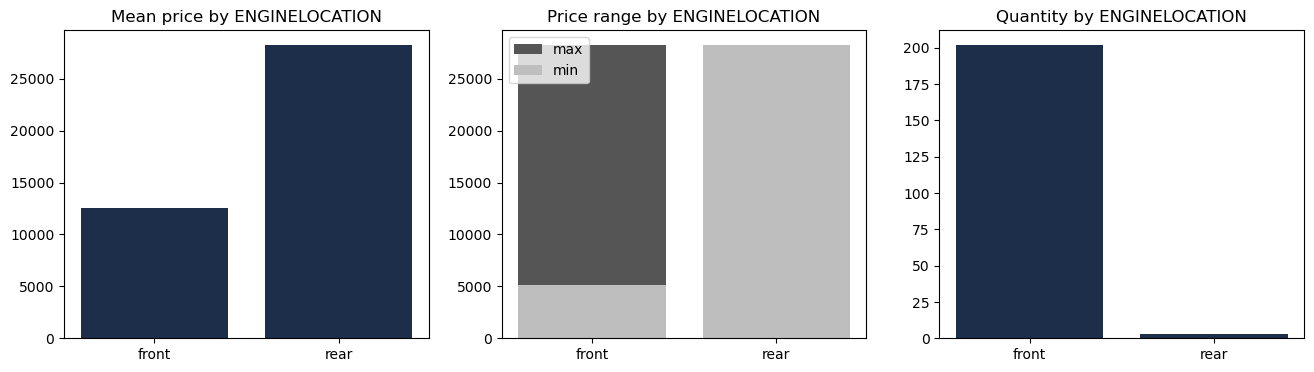

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'cylindernumber', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


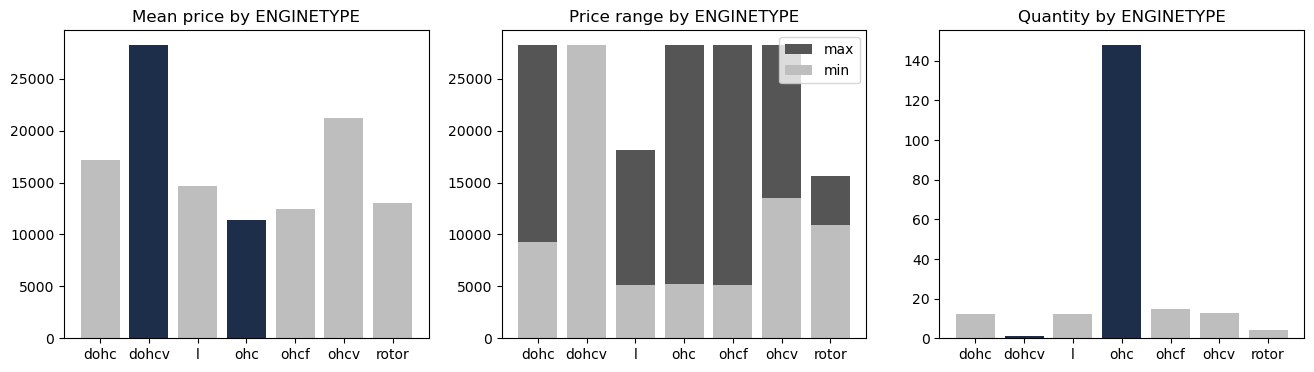

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


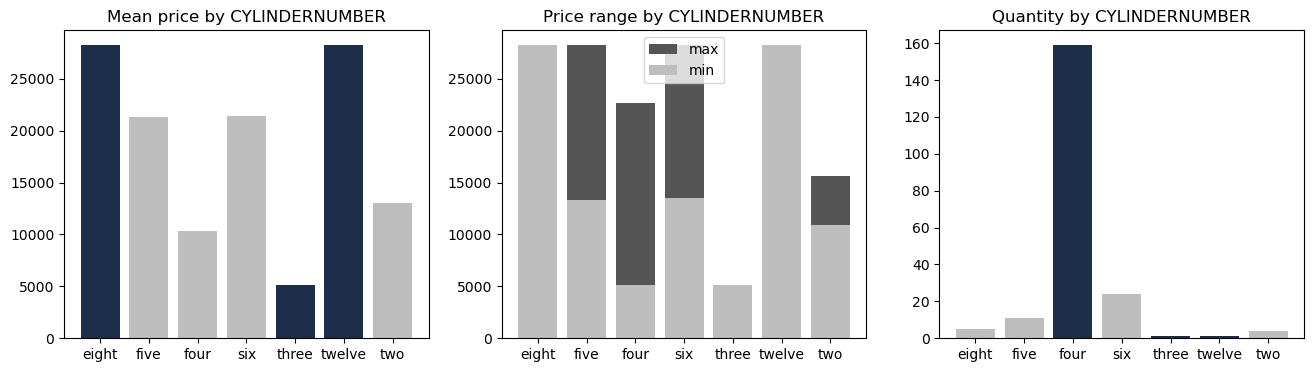

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_2940\1594712093.py:3: FutureWarning: ['CarName', 'CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']


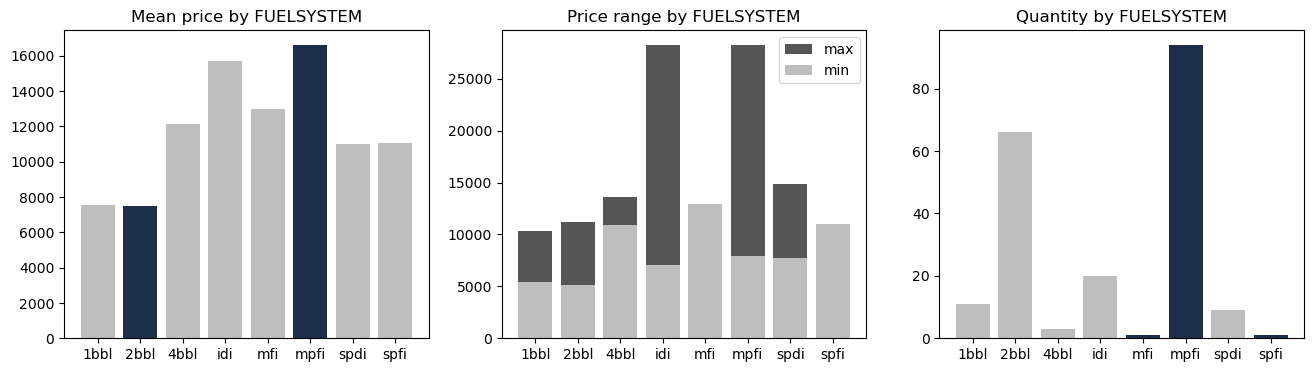

In [46]:
for col in df.iloc[:,4:].select_dtypes(include='object').columns:
    # group by
    df_group = df.groupby(df[col]).agg(['mean','max','min','count'])['price']
    # visualize
    fig, axes = plt.subplots(1,3)
    fig.set_size_inches(16,4)

    axes[0].bar(df_group.index,df_group['mean'],color=color(df_group,'mean'))
    axes[0].set_title(f'Mean price by {col.upper()}')

    axes[1].bar(df_group.index,df_group['max'],color='#555555')
    axes[1].set_title(f'Price range by {col.upper()}')
    axes[1].bar(df_group.index,df_group['min'],color='#bebebe')
    axes[1].legend(['max','min'])

    axes[2].bar(df_group.index,df_group['count'],color=color(df_group,'count'))
    axes[2].set_title(f'Quantity by {col.upper()}')
    plt.show()

#### Conclusion
- Cars accelerated by diesel are more expensive than those by gas; therefore, they are harder to sell compared to those by gas
- Carbody has a relatively strong effect on price, since the smallest price difference is even about $2,000
    - Hatchback and Sedan cars domains the market share, thanks to their large price ranges. Additionnally, they are relatively cheap, comparing to Convertible and Hardtop - those are much less sold
- 4wd-drivewheel cars are not favored despite their relatively low price, which is opposite to rwd-drivewheel cars. The reason may lie on price range: while rwd's is approachable for many kinds of customers, 4wd's is not
- Engine location definitely affects the price. It can be seen that mean price of rear-engine cars is twice as much as that of front-engine cars.
- 2 noticeable fuelsystems are 2bbl and mpfi - which are extremely common in the US. Their pattern seems opposite:
    - 2bbl: Lowest price + small price range ==> Prefer low price
    - mpfi: Highest price + large price range ==> Prefer affordability
- 2-door and 4-door cars's prices seem to have just a little difference
    - this conclusion again ensures the hypothesis testing result above

# Correlation

In [47]:
df_corr = df.select_dtypes(include=['float','int'])
df_corr = df_corr.corr()[((df_corr.corr() > 0.7) | (df_corr.corr() < -0.7))]

# drop all-NA columns and rows
df_corr.dropna(thresh=2,inplace=True,axis=1)
df_corr.dropna(thresh=1,inplace=True,axis=0)

df_corr

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price
wheelbase,1.000000,0.875408,0.799097,0.775221,NaN,NaN,NaN,NaN,NaN
carlength,0.875408,1.000000,0.848352,0.877971,0.700649,NaN,NaN,-0.701617,0.720464
carwidth,0.799097,0.848352,1.000000,0.873822,0.740207,NaN,NaN,NaN,0.788901
curbweight,0.775221,0.877971,0.873822,1.000000,0.865418,0.778407,-0.760796,-0.804434,0.868759
enginesize,NaN,0.700649,0.740207,0.865418,1.000000,0.839072,NaN,-0.702065,0.855126
horsepower,NaN,NaN,NaN,0.778407,0.839072,1.000000,-0.846060,-0.831491,0.821217
citympg,NaN,NaN,NaN,-0.760796,NaN,-0.846060,1.000000,0.967048,-0.726193
highwaympg,NaN,-0.701617,NaN,-0.804434,-0.702065,-0.831491,0.967048,1.000000,-0.739810
price,NaN,0.720464,0.788901,0.868759,0.855126,0.821217,-0.726193,-0.739810,1.000000


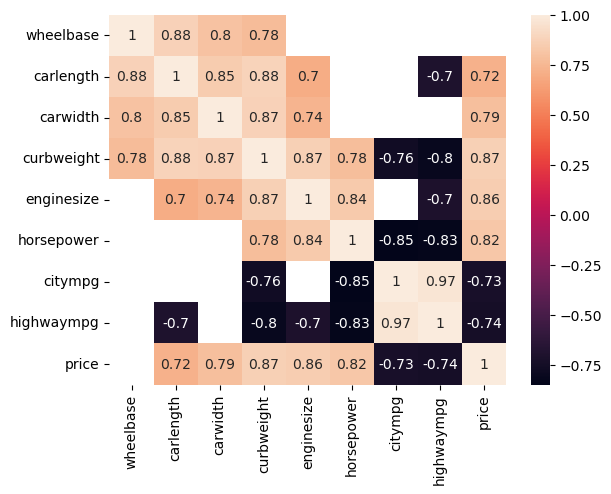

In [48]:

sns.heatmap(df_corr, annot=True)
plt.show()

## Conclusion
- Cars sold satisfy relatively enough the standard:
    - based on Wheelbase & CarLength
- The bigger a car is, the more expensive it is, and the less fuel efficiency:
    - based on CarLength, CarWidth, Price, HighwayMPG, CityMPG
- The stronger a car is, the less fuel effiency, and the more expensive:
    - based on HP, HighwayMPG, CityMPG, Price

# Maching Learning

## Preprocessing

### Feature Scaling

Scale all quantitive data

In [49]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_scaled = mms.fit_transform(df.iloc[:,1:].select_dtypes(include=['int','float']))
df_scaled = pd.DataFrame(df_scaled, columns=df.iloc[:,1:].select_dtypes(include=['int','float']).columns)

### Dummies
Encode all categorical data

In [50]:
df_dummies = pd.get_dummies(df.iloc[:,3:].select_dtypes(include='object').iloc[:,:])

### Feature Selection

#### Best quantitive features

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression

X_scaled = df_scaled.iloc[:, :-1]
Y = df_scaled.iloc[:, -1]     # price

test = SelectKBest(score_func=f_regression,k=4)
best_result = test.fit(X_scaled,Y)

best_X_scaled_train = pd.DataFrame(test.transform(X_scaled), columns=X_scaled.columns[test.get_support()])
best_X_scaled_train.iloc[:3,:]

,carwidth,curbweight,enginesize,horsepower
0,0.358491,0.411171,0.485915,0.463235
1,0.358491,0.411171,0.485915,0.463235
2,0.490566,0.517843,0.640845,0.779412


#### Best categorical features

In [52]:
from sklearn.feature_selection import SelectKBest

X_dummies = df_dummies
Y = df_scaled['price']

test = SelectKBest(k=6)
best_result = test.fit(X_dummies,Y)

best_X_dummies_train = pd.DataFrame(test.transform(X_dummies), columns=X_dummies.columns[test.get_support()])
best_X_dummies_train.iloc[:3,:]

c:\Users\ASUS FLIP 14\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,enginetype_rotor,cylindernumber_three,cylindernumber_two,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_spfi
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0


## Model 1.1: Predict Price based on most-influent features

In [53]:
from sklearn.linear_model import LinearRegression

# concatenate x_dummies and x_scaled into x_ml
best_X_train = pd.concat([best_X_scaled_train, best_X_dummies_train], axis=1)
Y = df_scaled['price']

# training
model = LinearRegression()
model.fit(best_X_train,Y)

# evaluation
exog = sm.add_constant(best_X_train)
estimator = sm.OLS(Y, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     111.1
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           8.16e-72
Time:                        23:34:44   Log-Likelihood:                 156.31
No. Observations:                 205   AIC:                            -292.6
Df Residuals:                     195   BIC:                            -259.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2349 

## Model 1.2: Predict Car Price based on each of most-influent quantitve features

### Training Model

In [54]:
def training_model(factor,predict_number):
    # training
    from sklearn import svm
    x_train = np.array(df[factor].values).reshape(-1,1)
    y_train = np.array(df['price'].values).reshape(-1,1)
    svr = svm.SVR(kernel='linear').fit(x_train,y_train)

    # testing
    x_predict = np.array(predict_number).reshape(-1,1)
    y_predict = svr.predict(x_predict)

    # evaluating
    print(f'Score of {factor}-price model: {svr.score(x_train,y_train)}')

    # visualize
    y_model = svr.intercept_ + svr.coef_*x_train
    plt.scatter(x_train,y_train, color='#bebebe')
    plt.plot(x_train,y_model,color='#1c2e4a')
    plt.scatter(x_predict,y_predict, color='red', marker='o')
    plt.xlabel(factor)
    plt.title(f'{factor.upper()} vs PRICE')
    plt.show()

    # regression result
    exog = sm.add_constant(x_train)
    estimator = sm.OLS(y_train, exog).fit()
    print(estimator.summary())

c:\Users\ASUS FLIP 14\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score of carwidth-price model: 0.005946596617970146


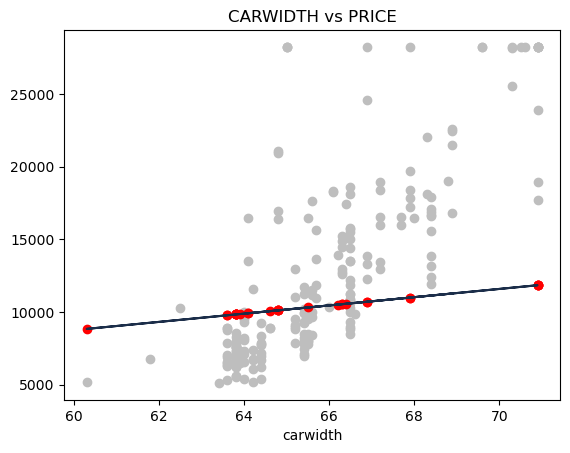

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     334.6
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           8.36e-45
Time:                        23:34:45   Log-Likelihood:                -1989.7
No. Observations:                 205   AIC:                             3983.
Df Residuals:                     203   BIC:                             3990.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.504e+05   8923.091    -16.855      0.0

c:\Users\ASUS FLIP 14\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


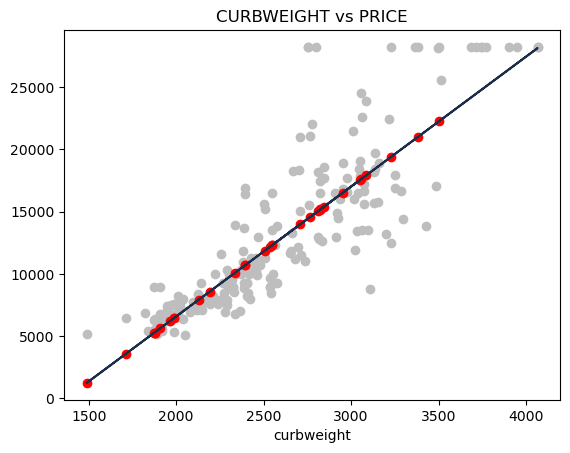

c:\Users\ASUS FLIP 14\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     624.7
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           7.16e-64
Time:                        23:34:45   Log-Likelihood:                -1945.4
No. Observations:                 205   AIC:                             3895.
Df Residuals:                     203   BIC:                             3902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.489e+04   1127.741    -13.202      0.0

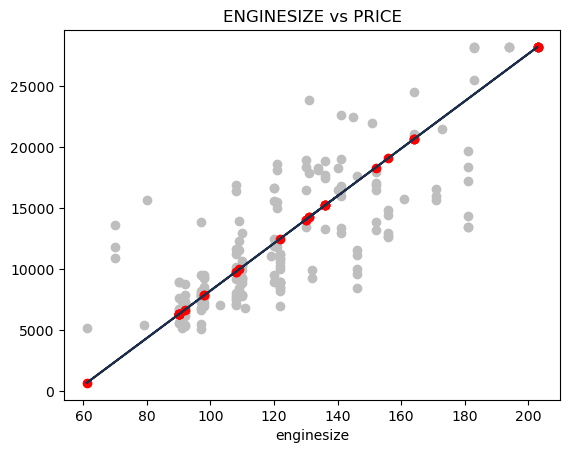

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     552.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           7.86e-60
Time:                        23:34:45   Log-Likelihood:                -1954.8
No. Observations:                 205   AIC:                             3914.
Df Residuals:                     203   BIC:                             3920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7828.4413    905.993     -8.641      0.0

c:\Users\ASUS FLIP 14\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


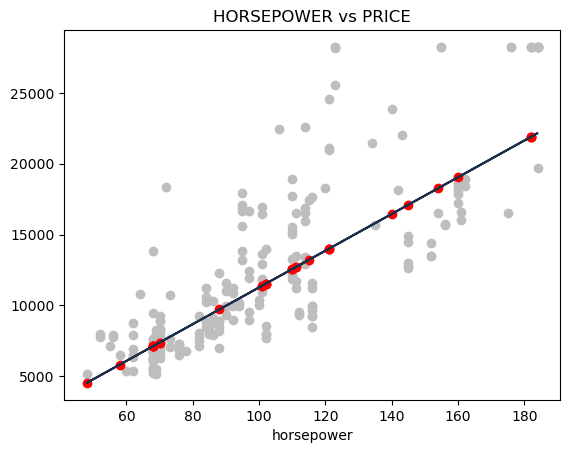

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     420.5
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           2.34e-51
Time:                        23:34:45   Log-Likelihood:                -1974.5
No. Observations:                 205   AIC:                             3953.
Df Residuals:                     203   BIC:                             3960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2668.1611    794.483     -3.358      0.0

In [55]:
## test
for feature in best_X_scaled_train.columns:
    training_model(feature, predict_number = df.loc[:30, feature])

## Model 3: Predict Price based on Car Size (length, height, width)

In [56]:
from sklearn.linear_model import LinearRegression

x_train = df.iloc[:, 10:14].values.reshape(-1,4)
y_train = df.iloc[:, 26].values.reshape(-1,1)

model = LinearRegression()
model.fit(x_train,y_train)


## Score Linear Regression Model
exog = sm.add_constant(x_train)
estimator = sm.OLS(y_train, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     96.09
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.82e-45
Time:                        23:34:46   Log-Likelihood:                -1979.6
No. Observations:                 205   AIC:                             3969.
Df Residuals:                     200   BIC:                             3986.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.148e+05    1.4e+04     -8.209      0.0